In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sqlalchemy import create_engine 
from textwrap import wrap
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from textwrap import wrap
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [7]:
data = pd.read_csv('goodreadbooks.csv', error_bad_lines=False)
data.head()

b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


In [8]:
data.shape

(13714, 10)

In [9]:
data.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '# num_pages', 'ratings_count', 'text_reviews_count'],
      dtype='object')

In [10]:
#data to sql
engine = create_engine('sqlite:///:memory:')
data.to_sql('books', engine)

# 10 Penulis dengan Karya Terbanyak

In [11]:
result = pd.read_sql_query('SELECT authors, COUNT(`bookID`) AS book_counter FROM books group by authors order by count(`bookID`) desc limit 10', engine);

df = pd.DataFrame(result, columns = ['authors','book_counter'] )
df.head(13000)

,authors,book_counter
0,Agatha Christie,69
1,Stephen King,66
2,Orson Scott Card,48
3,Rumiko Takahashi,46
4,P.G. Wodehouse,42
5,Terry Brooks,40
6,Piers Anthony,34
7,Margaret Weis-Tracy Hickman,33
8,Dan Simmons,32
9,Gabriel García Márquez,31


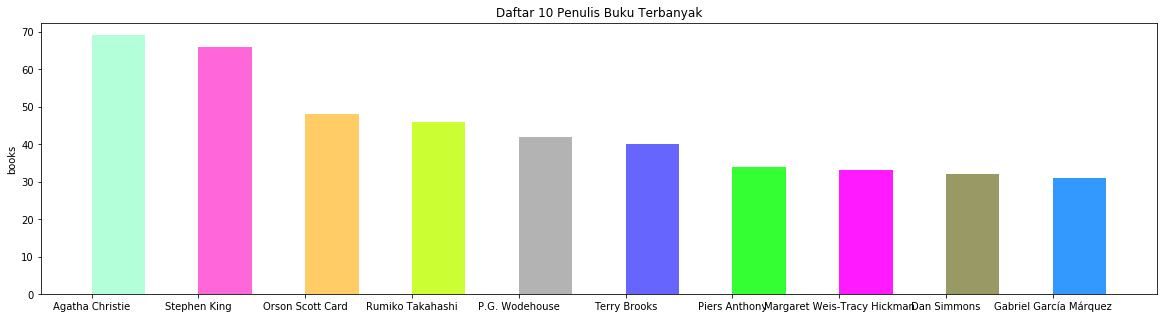

In [13]:
plt.figure(figsize=(20, 5))  # width:20, height:3
plt.bar(result['authors'], result['book_counter'], align='edge', width=0.5, color=['#b3ffd9','#ff66d9','#ffcc66','#ccff33',\
                                                                            '#b3b3b3','#6666ff','#33ff33','#ff1aff',\
                                                                           '#999966','#3399ff'])
plt.ylabel('books')
plt.title('Daftar 10 Penulis Buku Terbanyak')
plt.savefig('1.png')
plt.show()

# 7 Buku dengan Total Rating Tertinggi

In [14]:
result = pd.read_sql_query('SElECT authors,title, ratings_count AS jumlah_rate from books \
                           where language_code="en-US" group by authors order by ratings_count DESC limit 7',engine)

df = pd.DataFrame(result, columns = ['authors','title','jumlah_rate'] )
df.head(13000)
result['title'] = [ '\n'.join(wrap(l, 20)) for l in result['title'] ]   

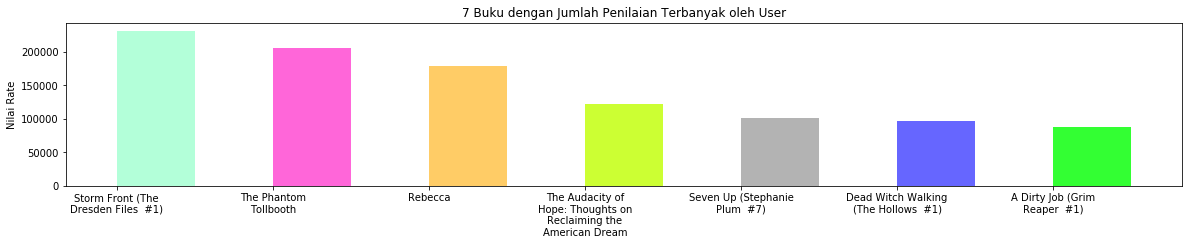

In [15]:
plt.figure(figsize=(20, 3)) 
plt.bar(result['title'],result['jumlah_rate'],
        align='edge', width=0.5, 
        color=['#b3ffd9','#ff66d9','#ffcc66','#ccff33','#b3b3b3','#6666ff','#33ff33','#ff1aff','#999966','#3399ff'])
plt.ylabel('Nilai Rate')
plt.title('7 Buku dengan Jumlah Penilaian Terbanyak oleh User')
plt.savefig('2.png')
plt.show()

# Persebaran Jumlah Buku Karya J.K. Rowling dalam Berbagai Bahasa 

In [16]:
result = pd.read_sql_query('SElECT authors,title, language_code, count(language_code) as bahasa from books \
                                   where authors like "%J.K. Rowling%" group by language_code  ',engine)

df = pd.DataFrame(result, columns = ['authors','title','language_code','bahasa'] )
df.head(13000)

,authors,title,language_code,bahasa
0,J.K. Rowling-Mary GrandPré,Harry Potter and the Half-Blood Prince (Harry ...,eng,16
1,J.K. Rowling-Jean-François Ménard,Harry Potter et le Prisonnier d'Azkaban (Harry...,fre,1
2,J.K. Rowling,Harry Potter und die Kammer des Schreckens (Ha...,ger,4
3,J.K. Rowling,Harry Potter and the Philosopher's Stone (Harr...,gla,1
4,J.K. Rowling-Serena Daniele-Beatrice Masini-Se...,Harry Potter e il Calice di Fuoco,ita,1
5,J.K. Rowling-Peter Needham,Harrius Potter et Philosophi Lapis,lat,2
6,J.K. Rowling-Дж.К. Ролинг-Владимир Бабков-Викт...,Гарри Поттер и Орден Феникса (Гарри Поттер #5),rus,2
7,J.K. Rowling,Harry Potter Y La Piedra Filosofal (Harry Pott...,spa,6
8,J.K. Rowling-Sevin Okyay,Harry Potter ve Sırlar Odası (Harry Potter #2),tur,2
9,J.K. Rowling-J.K.羅琳-皇冠編譯組-張定綺-彭倩文-趙丕慧-林靜華,混血王子的背叛 (哈利波特 #6),zho,2


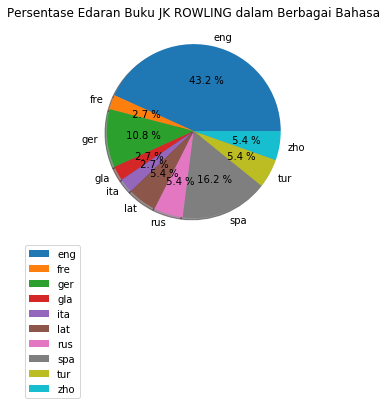

In [17]:
plt.pie(result['bahasa'], labels = result['language_code'],autopct ='% 1.1f %%', shadow = True) 
plt.title('Persentase Edaran Buku JK ROWLING dalam Berbagai Bahasa')
plt.legend(loc="upper right", bbox_to_anchor=(0,0)) #untuk lokasi keterangan warna
plt.savefig('3.png')
plt.show() 

# 10 Buku Karya Agatha Christie dengan Rating Tertinggi

In [18]:
result = pd.read_sql_query('SElECT authors,title, average_rating AS rating_buku from books \
where authors="Agatha Christie" order by average_rating DESC limit 10',engine)

df = pd.DataFrame(result, columns = ['authors','title','rating_buku'] )
df.head(13000)

,authors,title,rating_buku
0,Agatha Christie,Five Complete Miss Marple Novels: The Mirror C...,4.39
1,Agatha Christie,Miss Marple Omnibus Vol. 3 (Murder at the Vica...,4.33
2,Agatha Christie,Hercule Poirot's Casebook (Hercule Poirot #42),4.30
3,Agatha Christie,And Then There Were None,4.25
4,Agatha Christie,Ten Little Indians,4.25
5,Agatha Christie,Three Classic Mysteries Starring Miss Marple: ...,4.24
6,Agatha Christie,The Murder of Roger Ackroyd (Hercule Poirot #4),4.23
7,Agatha Christie,Miss Marple: The Complete Short Stories (Miss ...,4.20
8,Agatha Christie,Poirot: The Complete Ariadne Oliver Vol. 2,4.20
9,Agatha Christie,Miss Marple Meets Murder: The Mirror Crack'd /...,4.17


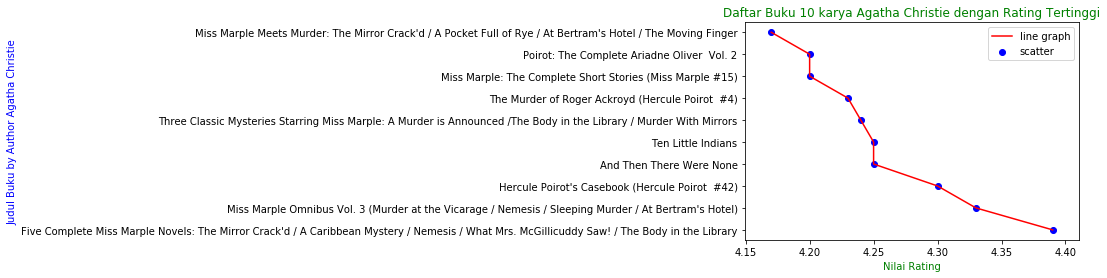

In [19]:
plt.scatter(result["rating_buku"],result["title"],color="blue",label="scatter")
plt.plot 
plt.xlabel("Nilai Rating",color="green") #xlabel() defines the label of x-axis
plt.ylabel("Judul Buku by Author Agatha Christie",color="blue") #ylabel() defines the label of x-axis
plt.title("Daftar Buku 10 karya Agatha Christie dengan Rating Tertinggi",color="green") #title() is used to give title of this scatter plot
plt.plot(result["rating_buku"],result["title"],color="red",label="line graph") #plot() is used to create line graph
plt.legend()
plt.savefig('4.png')
plt.show()

# 7 Rekomendasi Buku berdasarkan Author/Penulis 

In [20]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(data['authors'])
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [21]:
cosine_sim

array([[1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.61166192],
       [0.        , 0.        , 0.        , ..., 0.        , 0.61166192,
        1.        ]])

In [22]:
# Build a 1-dimensional array with book titles
titles = data['title']
indices = pd.Series(data.index, index=data['title'])

# Function that get book recommendations based on the cosine similarity score of book authors
def authors_recommendations(title):
    query = title
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[2:9]
    
    book_indices = [i[0] for i in sim_scores]
    title_recomend = titles.iloc[book_indices]
     
    #convert series to dataframe    
    df = title_recomend.to_frame().reset_index()
    df.columns = ['idbook', 'title']
    
    #convert list to data frame
    df1 = pd.DataFrame(sim_scores, columns=['idbook', 'similarity'])
    #print (df1)
    
    #join df & df1
    result = pd.merge(df, df1, how='inner', on='idbook')
    print(result)
    
    
    result['title'] = [ '\n'.join(wrap(l, 20)) for l in result['title'] ]   
    plt.figure(figsize=(15, 3))  # width:20, height:3
    plt.bar(result['title'], result['similarity'], align='edge', width=0.5, color='pink')
    plt.ylabel('similarity')
    plt.title('Top 7 Recommendations Books by Author with \'{}\' Title'.format(query))
    plt.savefig('5.png')
    plt.show()

   idbook                                              title  similarity
0      88             ebay Timesaving Techniques for Dummies    1.000000
1      89  eBay Business All-in-One Desk Reference for Du...    1.000000
2    7751  War Comes to Willy Freeman (Arabus Family Saga...    0.319061
3   11602                                               Rosa    0.190802
4   10246                       Floating in My Mother's Palm    0.154330
5     518                                              Medea    0.150764
6    2724  My Little House Crafts Book: 18 Projects from ...    0.126077


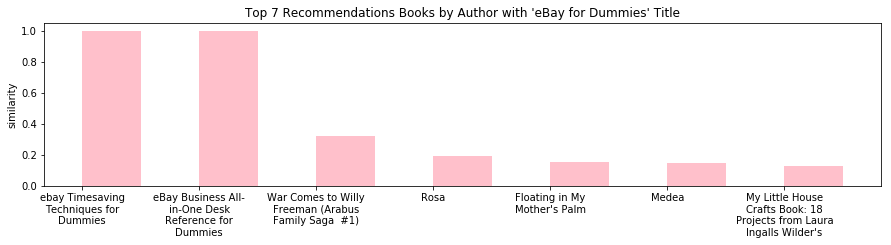

In [23]:
authors_recommendations('eBay for Dummies')